In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('newdata2.csv')
df=df.drop(['year','month','day'], axis=1)

In [ ]:
df.head()

,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall,Classify
0,23,16,70,1012,4,11,0.00,0
1,24,17,70,1014,3,17,0.00,0
2,24,11,60,1014,3,5,0.09,1
3,23,13,53,1016,3,3,0.03,1
4,31,16,74,1011,3,3,0.00,0


In [ ]:
df.isnull().sum()

tempavg          0
DPavg            0
humidity avg     0
SLPavg           0
visibilityavg    0
windavg          0
Rainfall         0
Classify         0
dtype: int64

In [ ]:
df.columns

Index(['tempavg', 'DPavg', 'humidity avg', 'SLPavg', 'visibilityavg',
       'windavg', 'Rainfall', 'Classify'],
      dtype='object')

In [ ]:
for col in df.columns:

  # Checking if the column contains
  # any null values
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)

df.isnull().sum().sum()

0

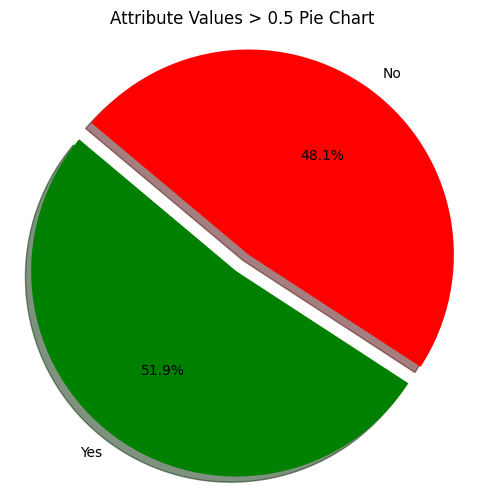

In [ ]:
# Extract the values of the desired attribute column
attribute_values = df['Classify'].values  # Replace 'attribute_column_name' with the actual column name from your CSV file

# Count 'Yes' and 'No'
yes_count = sum(1 for val in attribute_values if val == 1)
no_count = len(attribute_values) - yes_count

# Data to plot
labels = ['Yes', 'No']
sizes = [yes_count, no_count]
colors = ['green', 'red']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Attribute Values > 0.5 Pie Chart')
plt.show()


In [ ]:
df.Classify.value_counts()


1    2596
0    2404
Name: Classify, dtype: int64

In [ ]:
x=df.iloc[:,:7].values     #Assigning variables to the dependent and independent attiributes
y=df.iloc[:,7].values

In [ ]:
features = list(df.select_dtypes(include = np.number).columns)
print(features)

['tempavg', 'DPavg', 'humidity avg', 'SLPavg', 'visibilityavg', 'windavg', 'Rainfall', 'Classify']


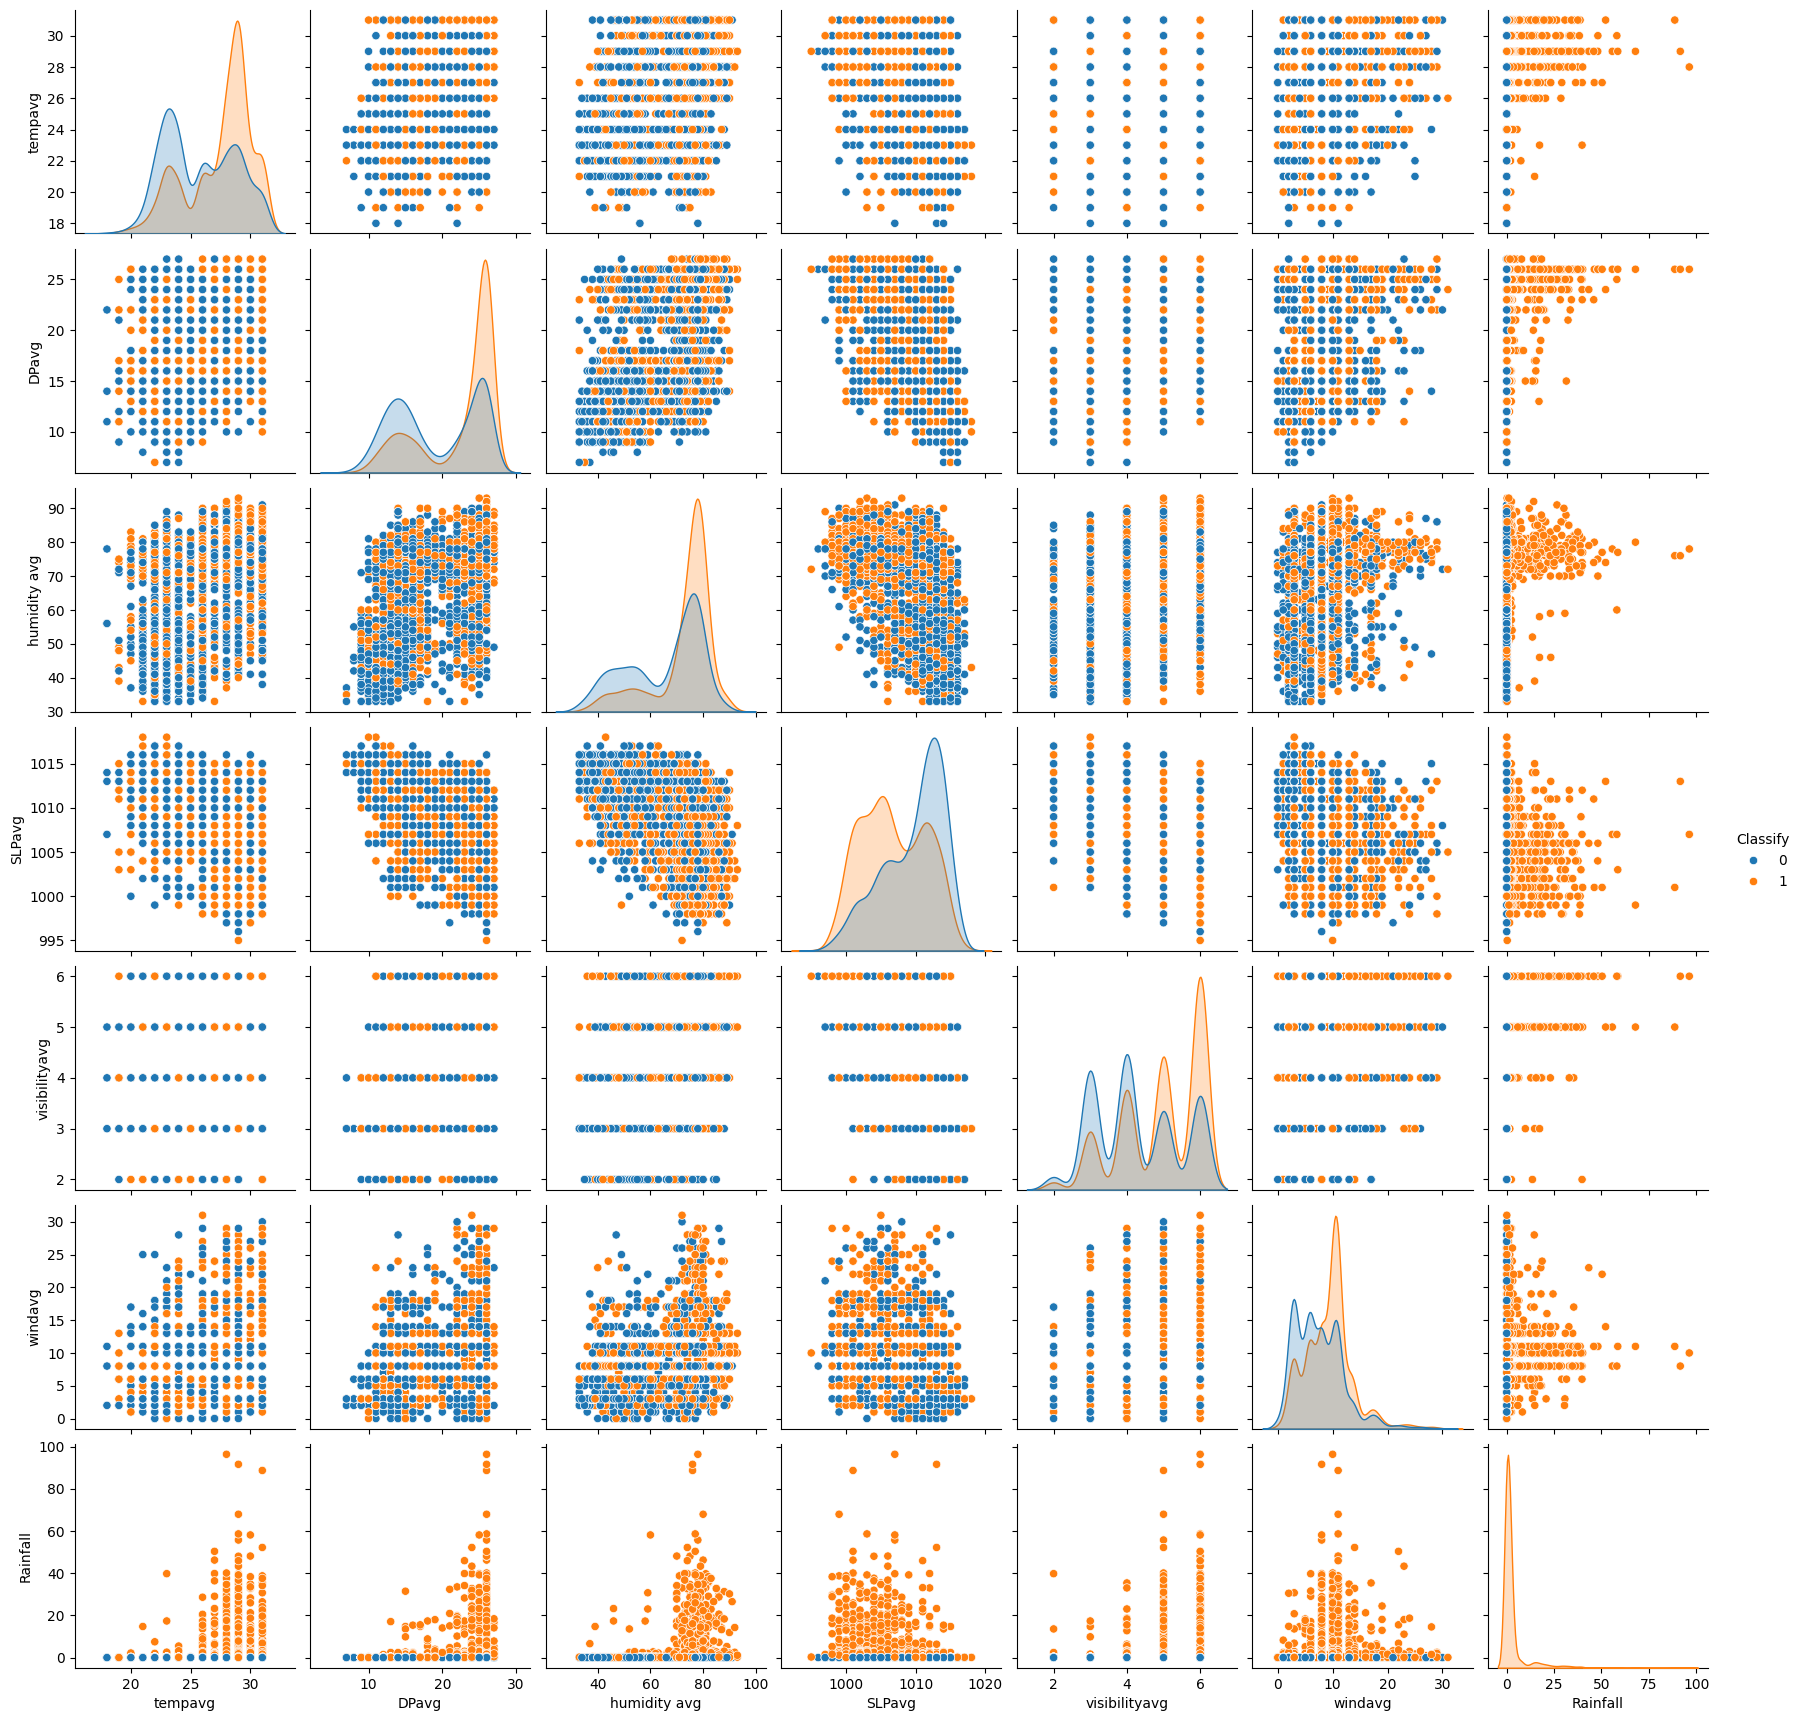

In [ ]:
sb.pairplot(df, hue='Classify')

In [ ]:
features_num = [ 'tempavg', 'DPavg', 'humidity avg','SLPavg', 'visibilityavg','windavg','Rainfall']

<Axes: >

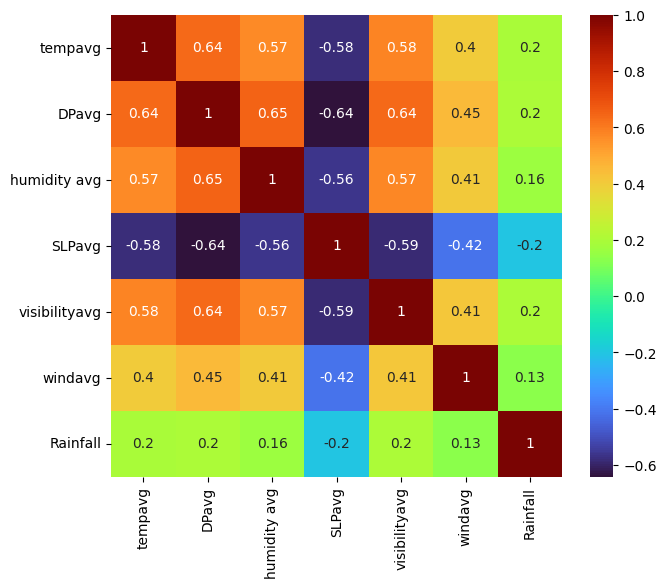

In [ ]:
corr = df[features_num].corr()

plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,2,1)
sb.heatmap(corr, annot=True, cmap='turbo')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Classify"],axis = 1)),
        columns=[ 'tempavg', 'DPavg', 'humidity avg', 'SLPavg', 'visibilityavg',
       'windavg', 'Rainfall'])

In [ ]:
X.head()

,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
0,-1.228851,-0.848096,0.078002,0.813584,-0.534485,0.580353,-0.263475
1,-0.891310,-0.669504,0.078002,1.237260,-1.386663,1.929697,-0.263475
2,-0.891310,-1.741054,-0.673901,1.237260,-1.386663,-0.768991,-0.247309
3,-1.228851,-1.383871,-1.200233,1.660936,-1.386663,-1.218772,-0.258087
4,1.471475,-0.848096,0.378764,0.601747,-1.386663,-1.218772,-0.263475


In [ ]:
y=df['Classify']

In [ ]:
y

0       0
1       0
2       1
3       1
4       0
       ..
4995    0
4996    0
4997    1
4998    0
4999    0
Name: Classify, Length: 5000, dtype: int64

DATA VALIDATION

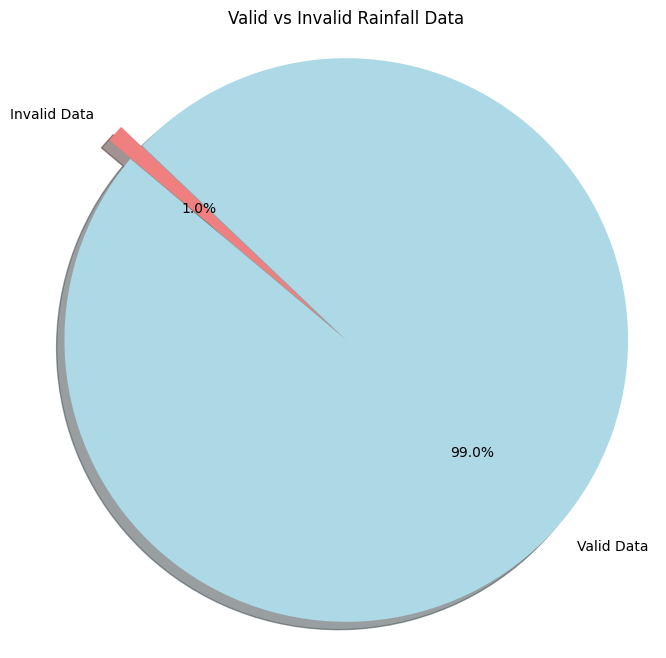

In [ ]:
import csv
import datetime
import matplotlib.pyplot as plt

class RainfallDataValidator:
    def __init__(self):
        self.valid_count = 0
        self.invalid_count = 0

    def validate_date(self, year, month, day):
        try:
            # Attempt to create a date object from the provided year, month, and day
            datetime.datetime(year, month, day)
            return True
        except ValueError:
            return False

    def validate_float(self, value):
        try:
            float(value)
            return True
        except ValueError:
            return False

    def validate_rainfall_data(self, data):
        # Validate each attribute of the rainfall data
        if not self.validate_date(int(data['year']), int(data['month']), int(data['day'])):
            self.invalid_count += 1
            return False, None
        if not self.validate_float(data['tempavg']):
            self.invalid_count += 1
            return False, None
        if not self.validate_float(data['DPavg']):
            self.invalid_count += 1
            return False, None
        if not self.validate_float(data['humidity avg']):
            self.invalid_count += 1
            return False, None
        if not self.validate_float(data['SLPavg']):
            self.invalid_count += 1
            return False, None
        if not self.validate_float(data['visibilityavg']):
            self.invalid_count += 1
            return False, None
        if not self.validate_float(data['windavg']):
            self.invalid_count += 1
            return False, None
        if not self.validate_float(data['Rainfall']):
            self.invalid_count += 1
            return False, None

        # Classify based on Rainfall value
        Classify = 0 if float(data['Rainfall']) == 0 else 1
        self.valid_count += 1
        return True, Classify

# Create an instance of the validator
validator = RainfallDataValidator()

# Open the CSV file and validate each row of data
with open('newdata2.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        is_valid, Classify = validator.validate_rainfall_data(row)
        if not is_valid:
            continue

# Plotting the pie chart for valid and invalid data
labels = ['Valid Data', 'Invalid Data']
sizes = [validator.valid_count, validator.invalid_count]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Valid vs Invalid Rainfall Data')

plt.show()


TEST-TRAIN SPLIT

In [ ]:
from sklearn.model_selection import train_test_split                #splitting the dataset

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.2,random_state=42)

LOGISTIC REGRESSION

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Logistic Regression model
log_reg = LogisticRegression(max_iter=5000)


X_train_rfe = X_train
X_test_rfe=X_test
# Fit the model with the selected features
log_reg.fit(X_train_rfe, Y_train)

# Accuracy calculation on the selected features
log_acc_train = accuracy_score(Y_train, log_reg.predict(X_train_rfe))
log_acc_test = accuracy_score(Y_test, log_reg.predict(X_test_rfe))

print("Train Set Accuracy (with feature selection): {:.2f}%".format(log_acc_train * 100))
print("Test Set Accuracy (with feature selection): {:.2f}%".format(log_acc_test * 100))

from sklearn.metrics import confusion_matrix

# Predictions on training set
y_pred_train = log_reg.predict(X_train_rfe)

# Confusion matrix for training set
conf_matrix_train = confusion_matrix(Y_train, y_pred_train)
print("Confusion Matrix (Training Set):")
print(conf_matrix_train)

# Predictions on test set
y_pred_test = log_reg.predict(X_test_rfe)

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(Y_test, y_pred_test)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)


Train Set Accuracy (with feature selection): 65.03%
Test Set Accuracy (with feature selection): 65.40%
Confusion Matrix (Training Set):
[[1074  849]
 [ 550 1527]]
Confusion Matrix (Test Set):
[[274 207]
 [139 380]]


KNN

In [ ]:
import numpy as np

class KNNClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        # Convert input to numpy arrays
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        # Convert input to numpy array
        X_test = np.array(X_test)

        y_pred = []
        for x in X_test:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))  # Euclidean distance
            nearest_indices = np.argsort(distances)[:self.k]  # Indices of k nearest neighbors
            nearest_labels = self.y_train[nearest_indices]  # Corresponding labels of k nearest neighbors
            y_pred.append(np.bincount(nearest_labels).argmax())  # Majority voting
        return np.array(y_pred)

# Instantiate the KNN classifier with a specified k value
knn = KNNClassifier(k=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = knn.predict(X_train)

# Calculate training accuracy
train_accuracy = np.mean(y_train_pred == y_train)
print("Training Accuracy:", train_accuracy*100)

# Make predictions on the test set
y_test_pred = knn.predict(X_test)

# Calculate test accuracy
test_accuracy = np.mean(y_test_pred == y_test)
print("Test Accuracy:", test_accuracy*100)

from sklearn.metrics import confusion_matrix

# Make predictions on the training set
y_train_pred = knn.predict(X_train)

# Confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Set):")
print(conf_matrix_train)

# Make predictions on the test set
y_test_pred = knn.predict(X_test)

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)



Training Accuracy: 73.125
Test Accuracy: 62.2
Confusion Matrix (Training Set):
[[1366  557]
 [ 518 1559]]
Confusion Matrix (Test Set):
[[298 183]
 [195 324]]


SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score

svm = SVC()
svm.fit(X_train, Y_train)

# Accuracy calculation
svm_acc_test = accuracy_score(Y_test, svm.predict(X_test))
svm_acc_train = accuracy_score(Y_train, svm.predict(X_train))

print(f"Train Set Accuracy: {svm_acc_train * 100:.2f}%")
print(f"Test Set Accuracy: {svm_acc_test * 100:.2f}%")

from sklearn.metrics import confusion_matrix

# Predictions on training set
y_pred_train = svm.predict(X_train)

# Confusion matrix for training set
conf_matrix_train = confusion_matrix(Y_train, y_pred_train)
print("Confusion Matrix (Training Set):")
print(conf_matrix_train)

# Predictions on test set
y_pred_test = svm.predict(X_test)

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(Y_test, y_pred_test)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)


Train Set Accuracy: 61.78%
Test Set Accuracy: 59.10%
Confusion Matrix (Training Set):
[[ 696 1227]
 [ 302 1775]]
Confusion Matrix (Test Set):
[[156 325]
 [ 84 435]]


STRATIFIED SHUFFLE SPLIT

In [ ]:
from sklearn.utils import resample

num=df.iloc[:,-1].value_counts()
d=resample(df[df.iloc[:,-1]==1] , replace=True,    # sample with replacement
                                 n_samples= num[0], # to match majority class
                                 random_state=42)  # reproducible results)
data=pd.concat([d,df[df.iloc[:,-1]==0]])

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.1, random_state=42)

# Create PolynomialFeatures and MinMaxScaler
Polynom = PolynomialFeatures(degree=3)
scaler = MinMaxScaler()

# Transform the features
data_poly = Polynom.fit_transform(data.iloc[:, :-1])
data_scaled = scaler.fit_transform(data_poly)

# Create a DataFrame with the transformed features and concatenate the target variable
data2 = pd.DataFrame(data_scaled, columns=[f'poly_{i}' for i in range(data_scaled.shape[1])])
data2['target'] = data.iloc[:, -1].values

num=data2.iloc[:,-1].value_counts()
data2=data2.sample(len(data2))

train=0
test=0
for idx_train,idx_test in sss.split(data2.iloc[:,:-1],data2.iloc[:,-1]):
    train=data2.iloc[idx_train,:]
    test=data2.iloc[idx_test,:]


RANDOM FOREST

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# Creating a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Predicting on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Generating a classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

from sklearn.metrics import confusion_matrix

# Predictions on test set
y_pred_test = rf_classifier.predict(X_test)

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(Y_test, y_pred_test)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)


Accuracy: 0.628
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.71      0.65       481
           1       0.67      0.55      0.61       519

    accuracy                           0.63      1000
   macro avg       0.63      0.63      0.63      1000
weighted avg       0.64      0.63      0.63      1000

Confusion Matrix (Test Set):
[[343 138]
 [234 285]]


Feed Forward Network

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# Assuming you have your dataset in a CSV file named 'rainfall_data.csv'
# Load the dataset
data = pd.read_csv('newdata2.csv')

# Drop any rows with missing values
data.dropna(inplace=True)

# Extracting features and target variable
X = data[['tempavg', 'DPavg', 'humidity avg', 'SLPavg', 'visibilityavg', 'windavg']]
y = data['Classify']  # Assuming 'classify' is the name of the additional attribute (0 or 1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Keras model for classification
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions
keras_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", keras_accuracy)

from sklearn.metrics import confusion_matrix

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)



Epoch 1/10
125/125 [==============================] - 1s 2ms/step - loss: 0.6395 - accuracy: 0.6327
Epoch 2/10
125/125 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.6643
Epoch 3/10
125/125 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.6643
Epoch 4/10
125/125 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.6708
Epoch 5/10
125/125 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.6722
Epoch 6/10
125/125 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.6718
Epoch 7/10
125/125 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.6727
Epoch 8/10
125/125 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.6743
Epoch 9/10
125/125 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.6708
Epoch 10/10
32/32 [==============================] - 0s 2ms/step
Accuracy: 0.67
Confusion Matrix:
[[

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVM',  'Random Forest',' Feed Forward Network'],
    'Score': [ log_acc_test,knn_acc, svm_acc_test ,accuracy,keras_accuracy]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Feed Forward Network,0.670
0,Logistic,0.654
1,KNN,0.647
3,Random Forest,0.628
2,SVM,0.591


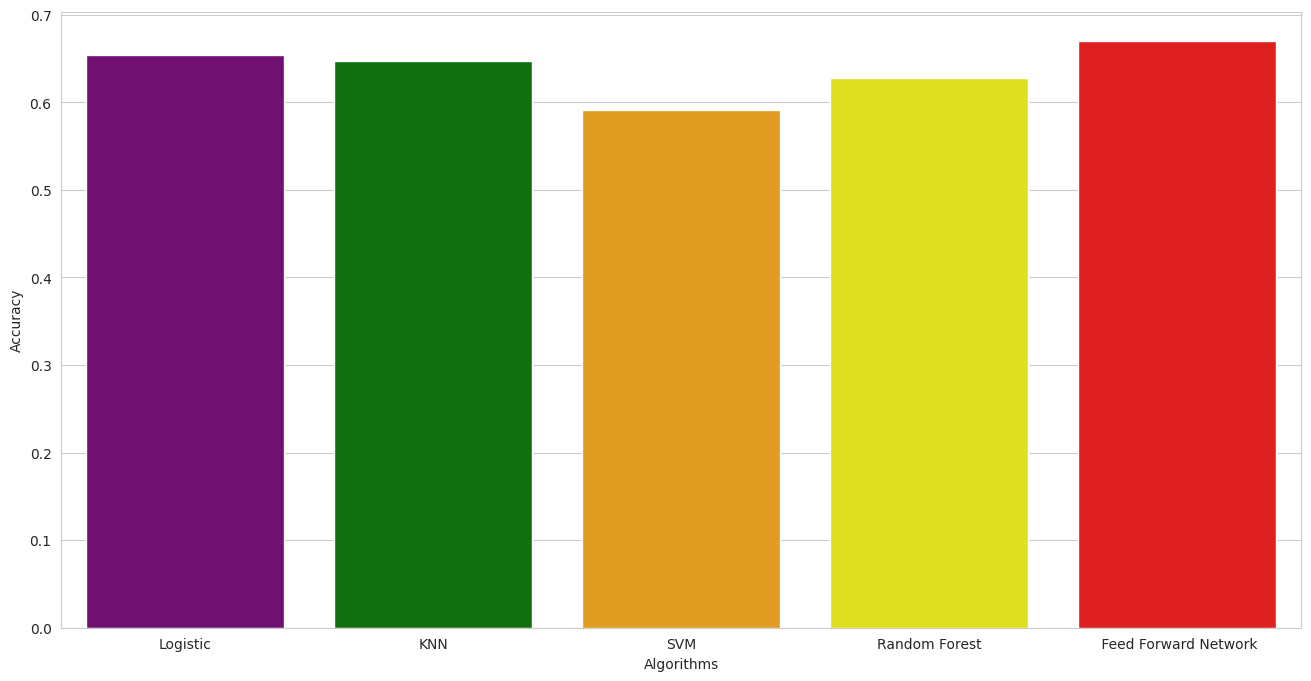

In [ ]:
colors = ["purple", "green", "orange","yellow","red",]

sb.set_style("whitegrid")
plt.figure(figsize=(16,8))
sb.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
plt.show()

In [ ]:
ypred = rf_classifier.predict([[27,24,82,1007,6,6,29.07]])  #118 ##lr ##rf

In [ ]:
ypred

array([1])